# 读取原始影像并模拟噪声

In [177]:
import scipy.io as sio
from mat73 import loadmat
import numpy as np
import matplotlib.pyplot as plt
import os

In [188]:
# 加载Source.mat文件
data_dir = '../Dataset'
dataset = 'HyRANK'
# other = 'Source/Source.mat'
other = 'Target/Target.mat'
file_name = os.path.join(data_dir, dataset, other)
print(file_name)

../Dataset/HyRANK/Target/Target.mat


In [189]:
if dataset == 'Houston':
    data = loadmat(file_name)
else:
    data = sio.loadmat(file_name)
hyperspectral_image = data['ori_data']  # 假设数据矩阵的变量名为'ori_data'

In [190]:
height, width, num_bands = hyperspectral_image.shape
print(f"Loaded hyperspectral image with shape: {num_bands} bands, {height} height, {width} width")

Loaded hyperspectral image with shape: 176 bands, 249 height, 945 width


In [191]:
def add_gaussian_noise(image, snr_db):
    """
    向高光谱影像添加高斯白噪声。
    
    :param image: 高光谱影像数据，形状为 (height, width, num_bands)
    :param snr_db: 信噪比（以分贝为单位）
    :return: 添加噪声后的高光谱影像
    """
    signal_power = np.mean(image ** 2)  # 计算信号功率
    snr_linear = 10 ** (snr_db / 10)  # 将信噪比从dB转换为线性值
    noise_power = signal_power / snr_linear  # 计算噪声功率
    noise = np.random.normal(0, np.sqrt(noise_power), image.shape)  # 生成高斯噪声
    noisy_image = image + noise  # 将噪声添加到影像中
    return noisy_image

In [192]:
def apply_spectral_variability(image, scaling_factor_range=(0.75, 1.25)):
    """
    应用光谱变异性，通过随机缩放每个波段。
    
    :param image: 高光谱影像数据，形状为 (height, width, num_bands)
    :param scaling_factor_range: 缩放因子的范围（默认0.75到1.25）
    :return: 应用光谱变异性后的高光谱影像
    """
    scaling_factors = np.random.uniform(scaling_factor_range[0], scaling_factor_range[1], (1, 1, image.shape[2]))
    variable_image = image * scaling_factors
    return variable_image

In [193]:
def simulate_degradation(image, snr_db, scaling_factor_range=(0.75, 1.25)):
    noisy_image = add_gaussian_noise(image, snr_db)
    degraded_image = apply_spectral_variability(noisy_image, scaling_factor_range)
    return degraded_image

In [194]:
# 模拟降质效果
snr_db = 5
scaling_factor_range = (0.75, 1.25)
simulated_image = simulate_degradation(hyperspectral_image, snr_db, scaling_factor_range)

In [195]:
# 保存经过模拟后的数据
output_data = {'ori_data': simulated_image}
file_dir = 'Noise' + dataset + '_' + str(snr_db) + 'db'
save_dir = os.path.join(file_dir, other)
print(save_dir)
sio.savemat(save_dir, output_data)

NoiseHyRANK_5db/Target/Target.mat


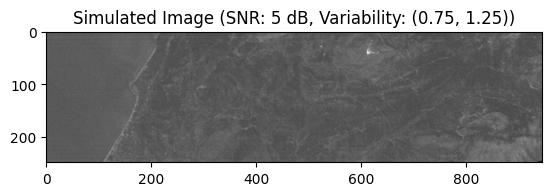

In [196]:
# 可视化最终模拟效果后的图像（仅显示第一个波段）
plt.figure()
plt.imshow(simulated_image[:, :, 0], cmap='gray')
plt.title(f"Simulated Image (SNR: {snr_db} dB, Variability: {scaling_factor_range})")
plt.show()

In [197]:
# 测试是否保存成功
simulated_data = sio.loadmat(save_dir)
hyperspectral_image = data['ori_data']  # 假设数据矩阵的变量名为'hyperspectral_image'
height, width, num_bands = hyperspectral_image.shape
print(f"Loaded hyperspectral image with shape: {num_bands} bands, {height} height, {width} width")

Loaded hyperspectral image with shape: 176 bands, 249 height, 945 width


## 读取Houston的参考地图文件并转换

In [ ]:
# 加载Houston的参考地图Source_map.mat/Target_map.mat文件
data_dir = '../Dataset'
dataset = 'Houston'
# other = 'Source/Source_map.mat'
other = 'Target/Target_map.mat'
file_name = os.path.join(data_dir, dataset, other)
print(file_name)

In [ ]:
data = loadmat(file_name)
map = data['map']  # 假设数据矩阵的变量名为'ori_data'

In [ ]:
height, width = map.shape
print(f"Loaded hyperspectral image with shape: bands, {height} height, {width} width")

In [ ]:
# 保存经过模拟后的数据
output_data = {'map': map}
file_dir = 'Noise' + dataset
save_dir = os.path.join(file_dir, other)
print(save_dir)
sio.savemat(save_dir, output_data)